Step 1: This file should be located in a directory which is in the same directory as zemax   
Step 2: Go to zemax, go to programming tab, zos-api.net..., python, interactive extension. This will create the zos connection file.      
Step 3: Click Interactive Extension

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *

import os 
import sys
import h5py
path = os.path.dirname(os.path.dirname(os.path.realpath("__file__")))


# sys.path.append(path)
sys.path.insert(0,path)
# zemax_path = path+"\Zemax\ZOS-API Projects\PythonZOSConnection\PythonZOSConnection.py" # work this out later


This initializes the connection.

In [41]:
%run -i "\\alfs1.physics.ox.ac.uk\al\howards\Zemax\ZOS-API Projects\PythonZOSConnection\PythonZOSConnection.py"

Found OpticStudio at:   %sc:\program files\zemax opticstudio
Connected to OpticStudio
Serial #:  L121911


In [44]:
mtf = TheSystem.Analyses.New_Analysis(ZOSAPI.Analysis.AnalysisIDM.FftMtf);
mtf.ApplyAndWaitForCompletion()

mtf_res = mtf.GetResults()

In [50]:
mtfsettings = mtf.GetSettings()


In [65]:
length = mtf_res.DataSeries.Length

angles = [0,5,3.5]
types = ['tan','sag']

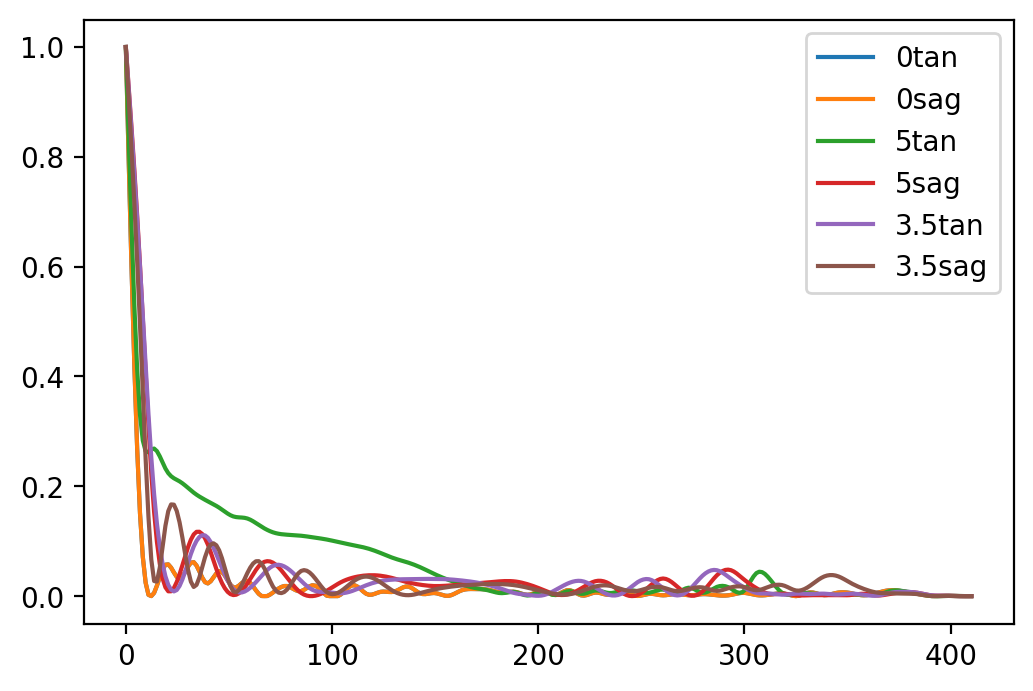

In [66]:
leg = []
plt.figure(dpi=200)
for i in range(length):
    xdat = double2array(mtf_res.DataSeries.GetValue(i).XData.Data)
    ydat = double2array(mtf_res.DataSeries.GetValue(i).YData.Data)

    # y consists of half data tagential and half sagittal. 
    ytan = ydat[::2]
    ysag = ydat[1::2]



    plt.plot(xdat,ytan,xdat,ysag)
    leg.append(str(angles[i]) + types[0])
    leg.append(str(angles[i]) + types[1])
plt.legend((leg))


